In [323]:
import hydra
import torch

import numpy as np
import pandas as pd
import plotnine as pn

from hydra.core.global_hydra import GlobalHydra

# Lets us import ibsg modules
import sys
sys.path.append("/Users/nathanielimel/uci/projects/ibsg/src")

from game.game import Game

In [324]:
all_data_fp = "../../analysis_data/all_data.csv"
df = pd.read_csv(all_data_fp)
df

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_60486/1048885480.py:2: DtypeWarning: Columns (10,16,20) have mixed types. Specify dtype option on import or set low_memory=False.


,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,prior,num_signals,distance,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,ib_bound_function
0,0.302817,0.285931,1.626097,10.196382,0.026481,-0.009173,0.749013,0.0,simulation,NaN,...,-8,10,squared_dist,0.0,0,replicator_diffusion,-1.0,2.0,42.0,NaN
1,2.704773,1.499383,0.412644,9.724241,NaN,NaN,NaN,1.0,trajectory,0.0,...,-8,10,squared_dist,0.0,0,replicator_diffusion,-1.0,2.0,42.0,NaN
2,0.203795,0.189977,1.722051,11.818519,NaN,NaN,NaN,1.0,trajectory,1.0,...,-8,10,squared_dist,0.0,0,replicator_diffusion,-1.0,2.0,42.0,NaN
3,0.151592,0.142945,1.769083,12.727127,NaN,NaN,NaN,1.0,trajectory,2.0,...,-8,10,squared_dist,0.0,0,replicator_diffusion,-1.0,2.0,42.0,NaN
4,0.151410,0.143119,1.768909,12.660234,NaN,NaN,NaN,1.0,trajectory,3.0,...,-8,10,squared_dist,0.0,0,replicator_diffusion,-1.0,2.0,42.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256344,0.085732,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,1,500,squared_dist,NaN,0,NaN,NaN,NaN,NaN,embo
256345,0.085732,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,1,500,squared_dist,NaN,0,NaN,NaN,NaN,NaN,embo
256346,0.085732,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,1,500,squared_dist,NaN,0,NaN,NaN,NaN,NaN,embo
256347,0.085732,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,1,500,squared_dist,NaN,0,NaN,NaN,NaN,NaN,embo


In [325]:
def get_df_subsetted_by_meaning_dists(df: pd.DataFrame, curve_metadata) -> pd.DataFrame:
    """Return a subset of the data consistent with the specifications in the curve_metadata config."""

    # See src/get_all_data.py
    universe = df["universe"].astype(str) == str(curve_metadata.universe)
    prior = df["prior"].astype(str) == str(curve_metadata.prior)
    num_signals = df["num_signals"] == curve_metadata.num_signals # this is prob not necessary
    distance = df["distance"] == curve_metadata.distance

    meaning_dist_gamma = df["meaning_dist_gamma"] == curve_metadata.meaning_dist_gamma


    # imprecise_imitation_gamma = df["imprecise_imitation_gamma"].isin([curve_metadata.meaning_dist_gamma, torch.nan]) # allows curve

    bound_func = df["ib_bound_function"].isin([curve_metadata.ib_bound_function, torch.nan]) # check for 'embo', 'homebuilt' for curves, nan for all simulations since those are curve agnostic.

    # df_subsetted = df[universe & prior & num_signals & num_signals & distance & meaning_dist_gamma & imprecise_imitation_gamma & bound_func]
    df_subsetted = df[universe & prior & num_signals & num_signals & distance & meaning_dist_gamma & bound_func]

    return df_subsetted

In [326]:
overrides = [
    "game.universe=100",
    "game.num_signals=100",
    "game.meaning_dist_gamma=0",
    # "simulation/dynamics=nowak_krakauer"
] # n.b.: do not include multirun overrides, we will filter from columns in the dataframe.

# Global initialization
GlobalHydra.instance().clear() # from previous runs of notebook
hydra.initialize(version_base=None, config_path="../../conf")
config = hydra.compose(
    config_name="config",
    overrides=overrides,
)

curve_metadata = config.game

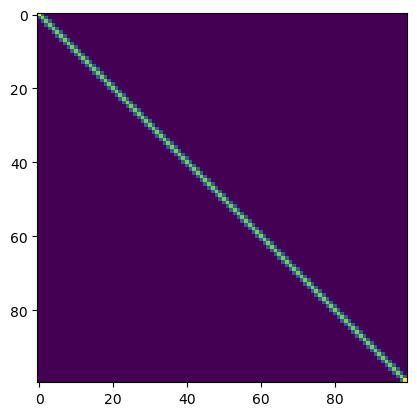

In [327]:
%matplotlib inline
import matplotlib.pyplot as plt

game = Game.from_hydra(config, cwd="/Users/nathanielimel/uci/projects/ibsg/data")
plt.imshow(game.meaning_dists)

In [328]:
# visualize the curve!
df = get_df_subsetted_by_meaning_dists(df, curve_metadata)
df

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,prior,num_signals,distance,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,ib_bound_function
146077,2.983033,2.951033,2.160638,20.342525,0.024574,-0.03067,0.742355,0.0,simulation,NaN,...,-8,100,squared_dist,0.0,0,replicator_diffusion,-1.0,2.0,42.0,NaN
146078,5.797586,4.268979,0.842691,1685.243800,NaN,NaN,NaN,1.0,trajectory,0.0,...,-8,100,squared_dist,0.0,0,replicator_diffusion,-1.0,2.0,42.0,NaN
146079,2.810301,2.755800,2.355870,39.393944,NaN,NaN,NaN,1.0,trajectory,1.0,...,-8,100,squared_dist,0.0,0,replicator_diffusion,-1.0,2.0,42.0,NaN
146080,2.821302,2.785093,2.326578,28.110016,NaN,NaN,NaN,1.0,trajectory,2.0,...,-8,100,squared_dist,0.0,0,replicator_diffusion,-1.0,2.0,42.0,NaN
146081,2.802565,2.773570,2.338101,26.525960,NaN,NaN,NaN,1.0,trajectory,3.0,...,-8,100,squared_dist,0.0,0,replicator_diffusion,-1.0,2.0,42.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240284,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,-8,100,squared_dist,NaN,0,NaN,NaN,NaN,NaN,embo
240285,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,-8,100,squared_dist,NaN,0,NaN,NaN,NaN,NaN,embo
240286,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,-8,100,squared_dist,NaN,0,NaN,NaN,NaN,NaN,embo
240287,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,-8,100,squared_dist,NaN,0,NaN,NaN,NaN,NaN,embo


In [329]:
df_final_points = df[df["point_type"] == "simulation"]
df_ib_bound = df[df["point_type"] == "ib_bound"]
df_mse_bound = df[df["point_type"] == "mse_bound"]

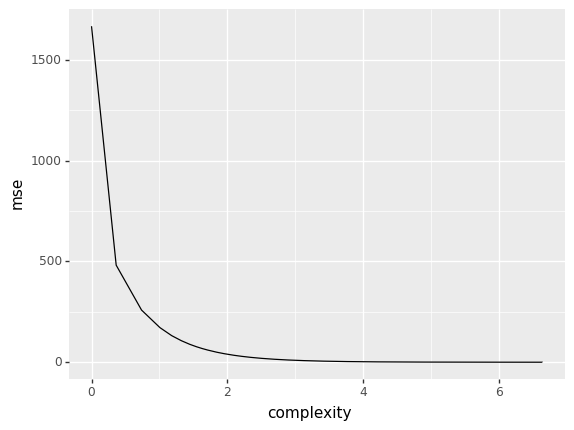

<ggplot: (691577484)>

In [330]:
(
    pn.ggplot(df_mse_bound, pn.aes(x="complexity", y="mse"))
    + pn.geom_line()
)

In [331]:
langs = df_final_points[df_final_points["population_init_gamma"] == -3]
langs

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,prior,num_signals,distance,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,ib_bound_function
147087,2.986731,2.954559,2.157111,20.250835,0.023724,-0.030441,0.742355,0.0,simulation,NaN,...,-8,100,squared_dist,0.0,0,replicator_diffusion,-1.0,-3.0,42.0,NaN
148501,3.006391,2.973260,2.138411,19.754179,0.019238,-0.029148,0.742355,0.0,simulation,NaN,...,-8,100,squared_dist,1.0,0,replicator_diffusion,-1.0,-3.0,42.0,NaN
149915,2.865894,2.839000,2.272672,23.741634,0.028264,-0.031509,0.739026,0.0,simulation,NaN,...,-8,100,squared_dist,-1.0,0,replicator_diffusion,-1.0,-3.0,42.0,NaN
151329,1.817743,1.812582,3.299088,101.682785,0.202950,-0.047968,0.729039,0.0,simulation,NaN,...,-8,100,squared_dist,-3.0,0,replicator_diffusion,-1.0,-3.0,42.0,NaN
152743,3.006403,2.973271,2.138399,19.753942,0.019236,-0.029147,0.742355,0.0,simulation,NaN,...,-8,100,squared_dist,3.0,0,replicator_diffusion,-1.0,-3.0,42.0,NaN
154157,3.006416,2.973284,2.138387,19.753620,0.019234,-0.029145,0.742355,0.0,simulation,NaN,...,-8,100,squared_dist,2.0,0,replicator_diffusion,-1.0,-3.0,42.0,NaN
155571,2.456068,2.441616,2.670054,41.441914,0.063070,-0.041086,0.732368,0.0,simulation,NaN,...,-8,100,squared_dist,-2.0,0,replicator_diffusion,-1.0,-3.0,42.0,NaN
156478,6.361888,5.030988,0.080684,1.123229,0.021328,-0.019436,3.355530,0.0,simulation,NaN,...,-8,100,squared_dist,0.0,0,replicator_diffusion,3.0,-3.0,42.0,NaN
157211,6.356307,4.838296,0.273375,178.592710,0.025881,0.036743,3.348873,0.0,simulation,NaN,...,-8,100,squared_dist,1.0,0,replicator_diffusion,3.0,-3.0,42.0,NaN
158067,6.263260,4.997466,0.114204,1.151971,0.024647,-0.021686,3.055931,0.0,simulation,NaN,...,-8,100,squared_dist,-1.0,0,replicator_diffusion,3.0,-3.0,42.0,NaN


/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


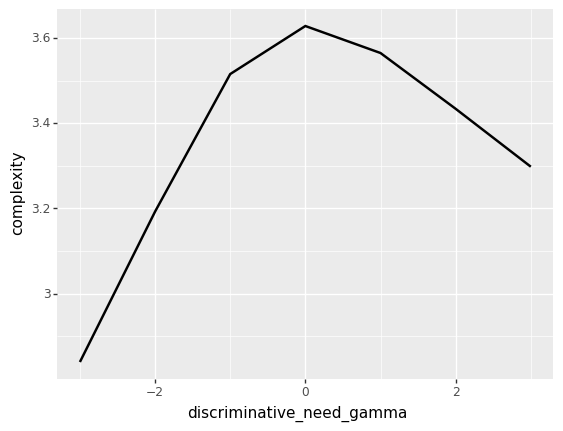

<ggplot: (703264087)>

In [332]:
(
    pn.ggplot(df_final_points, pn.aes(x="discriminative_need_gamma", y="complexity"))
    + pn.geom_smooth()
)

In [333]:
df_final_points["discriminative_need_gamma"] = 10 ** df_final_points["discriminative_need_gamma"]
df_final_points["imprecise_imitation_gamma"] = 10 ** df_final_points["imprecise_imitation_gamma"]

In [334]:
# restrict dynamics
df_final_points = df_final_points[df_final_points["dynamics"] == "replicator_diffusion"]

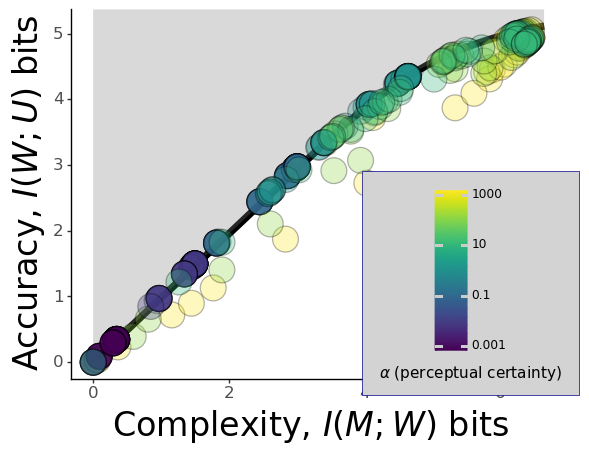

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6 x 6 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: evolang_figure


In [335]:
plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_ib_bound, mapping=pn.aes(x="complexity", y="accuracy")
    )  
    + pn.geom_line(size=3) # IB curve
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin="accuracy",
        ymax=torch.inf,
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_point( # emergent langs
        data=df_final_points,
        mapping=pn.aes(
            # fill="discriminative_need_gamma",
            fill="imprecise_imitation_gamma",
            ),
        alpha=0.3,
        size=10,
    )
    # + pn.labs(fill="$\\gamma$ (pragmatic precision)")
    + pn.labs(fill="$\\alpha$ (perceptual certainty)")    
    + pn.scale_fill_continuous(
        trans = "log10",
    )
    + pn.xlim([0,np.log2(100)])
    + pn.xlab("Complexity, $I(M;W)$ bits")
    + pn.ylab("Accuracy, $I(W;U)$ bits")

    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        legend_position=(0.75, 0.31),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    # guide not working, maybe should just use R
    + pn.guides(
        fill = pn.guide_colorbar(
            title_position = "bottom", 
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            ),
    ) 
)
print(plot)
plot.save("evolang_figure", width=6, height=6, dpi=300,)

In [336]:
# restrict to one specific gamma at a time
gammas = [
    0.001,
    0.01,
    0.1,
    1.0,
    10.0,
    100.0,
    1000.0,
]
df_final_points = df_final_points[df_final_points["discriminative_need_gamma"].isin(gammas)]

In [337]:
df_final_points = df_final_points[df_final_points["population_init_gamma"] == -3]
df_final_points

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,prior,num_signals,distance,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,ib_bound_function
147087,2.986731,2.954559,2.157111,20.250835,0.023724,-0.030441,0.742355,0.0,simulation,NaN,...,-8,100,squared_dist,1.000,0,replicator_diffusion,0.100,-3.0,42.0,NaN
148501,3.006391,2.973260,2.138411,19.754179,0.019238,-0.029148,0.742355,0.0,simulation,NaN,...,-8,100,squared_dist,10.000,0,replicator_diffusion,0.100,-3.0,42.0,NaN
149915,2.865894,2.839000,2.272672,23.741634,0.028264,-0.031509,0.739026,0.0,simulation,NaN,...,-8,100,squared_dist,0.100,0,replicator_diffusion,0.100,-3.0,42.0,NaN
151329,1.817743,1.812582,3.299088,101.682785,0.202950,-0.047968,0.729039,0.0,simulation,NaN,...,-8,100,squared_dist,0.001,0,replicator_diffusion,0.100,-3.0,42.0,NaN
152743,3.006403,2.973271,2.138399,19.753942,0.019236,-0.029147,0.742355,0.0,simulation,NaN,...,-8,100,squared_dist,1000.000,0,replicator_diffusion,0.100,-3.0,42.0,NaN
154157,3.006416,2.973284,2.138387,19.753620,0.019234,-0.029145,0.742355,0.0,simulation,NaN,...,-8,100,squared_dist,100.000,0,replicator_diffusion,0.100,-3.0,42.0,NaN
155571,2.456068,2.441616,2.670054,41.441914,0.063070,-0.041086,0.732368,0.0,simulation,NaN,...,-8,100,squared_dist,0.010,0,replicator_diffusion,0.100,-3.0,42.0,NaN
156478,6.361888,5.030988,0.080684,1.123229,0.021328,-0.019436,3.355530,0.0,simulation,NaN,...,-8,100,squared_dist,1.000,0,replicator_diffusion,1000.000,-3.0,42.0,NaN
157211,6.356307,4.838296,0.273375,178.592710,0.025881,0.036743,3.348873,0.0,simulation,NaN,...,-8,100,squared_dist,10.000,0,replicator_diffusion,1000.000,-3.0,42.0,NaN
158067,6.263260,4.997466,0.114204,1.151971,0.024647,-0.021686,3.055931,0.0,simulation,NaN,...,-8,100,squared_dist,0.100,0,replicator_diffusion,1000.000,-3.0,42.0,NaN


In [338]:
df_final_points["discriminative_need_gamma"] = df_final_points["discriminative_need_gamma"].astype(str)

In [339]:
# this is a dirty and beautiful hack from
# https://waldyrious.net/viridis-palette-generator/
fill_values_dict = {
    str(k): v for k, v in {
        "0.001": "#440154",
        "0.01": "#443983",
        "0.1": "#31688e",
        "1.0": "#21918c",
        "10.0": "#35b779",
        "100.0" : "#90d743",
        "1000.0": "#fde725", 
    }.items() }


In [340]:
# Make sure complexity max is np.log2(100)
df_ib_bound.complexity.max()

6.643856189774722

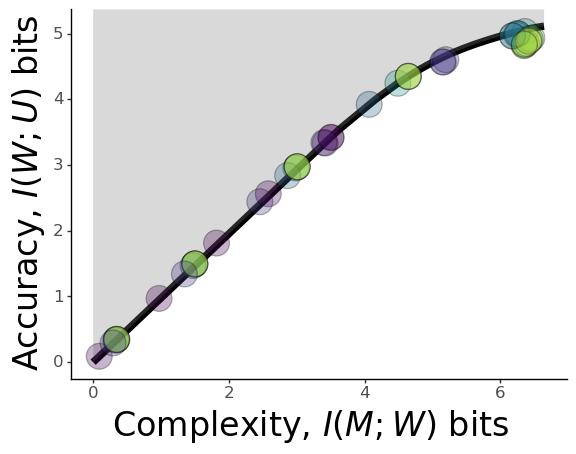

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 10 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: slide_figure


In [341]:
# for slides

plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_ib_bound, mapping=pn.aes(x="complexity", y="accuracy")
    )  
    + pn.geom_line(size=3) # IB curve
    # + pn.geom_point(size=1)
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin="accuracy",
        ymax=torch.inf,
        ),
        fill="gray",
        alpha=0.3,
    )
)

if True:
    plot = (
        plot 
        + pn.geom_jitter( # emergent langs
            data=df_final_points,
            mapping=pn.aes(
                # fill="discr_need",
                fill="discriminative_need_gamma",
                # shape="language",
                ),
            alpha=0.3,
            size=10,
            # fill="orange",
        )
        + pn.labs(fill="$\\gamma$ (pragmatic precision)")
        # + pn.scale_fill_continuous(
        #     trans = "log10",
        # )
        + pn.scale_fill_manual(values = fill_values_dict) 
    )
    
plot = (
    plot
    + pn.xlim([0,np.log2(100)])
    + pn.xlab("Complexity, $I(M;W)$ bits")
    + pn.ylab("Accuracy, $I(W;U)$ bits")

    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        # legend_position=(0.75, 0.4),
        legend_position='none',
    )    
)

print(plot)
plot.save("slide_figure", width=10, height=10, dpi=300,)

# df_final_points["discriminative_need_gamma"] = df_final_points["discriminative_need_gamma"].astype(float)

In [342]:
df_traj_points = df[df["point_type"] == "trajectory"]

df_traj_points["iteration"] = df_traj_points["round"]

# restrict dynamics
df_traj_points = df_traj_points[df_traj_points["dynamics"] == "replicator_diffusion"]

# restrict the initialization and gamma
new_df = df_traj_points.loc[(df_traj_points['population_init_gamma'] == -3) & (df_traj_points["discriminative_need_gamma"] == 3) & (df_traj_points["imprecise_imitation_gamma"] == 0)]


# optionally filter points
# new_df = new_df[new_df["iteration"] == new_df["iteration"].max()]


In [343]:
df_fudge = pd.DataFrame(
    {
        "complexity": 0.,
        "accuracy": 0.,
        "point_type": "trajectory",
        "round": 0.,
        "discriminative_need_gamma": -3.0,
        "population_init_gamma": 3.0,
        "iteration": 0.,
    },
    index=[0]
)
df_fudge
# new_df = pd.concat([df_fudge, new_df])

new_df

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,num_signals,distance,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,ib_bound_function,iteration
188508,9.536743e-07,9.536743e-07,5.111669,1666.377400,NaN,NaN,NaN,1.0,trajectory,0.0,...,100,squared_dist,3.0,0,replicator_diffusion,0.0,-3.0,42.0,NaN,0.0
188509,0.000000e+00,9.536743e-07,5.111669,1666.284400,NaN,NaN,NaN,1.0,trajectory,1.0,...,100,squared_dist,3.0,0,replicator_diffusion,0.0,-3.0,42.0,NaN,1.0
188510,1.907349e-06,2.861023e-06,5.111668,1666.208300,NaN,NaN,NaN,1.0,trajectory,2.0,...,100,squared_dist,3.0,0,replicator_diffusion,0.0,-3.0,42.0,NaN,2.0
188511,1.239777e-05,1.049042e-05,5.111660,1666.141600,NaN,NaN,NaN,1.0,trajectory,3.0,...,100,squared_dist,3.0,0,replicator_diffusion,0.0,-3.0,42.0,NaN,3.0
188512,7.152557e-05,6.580353e-05,5.111605,1666.073000,NaN,NaN,NaN,1.0,trajectory,4.0,...,100,squared_dist,3.0,0,replicator_diffusion,0.0,-3.0,42.0,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188703,4.643246e+00,4.348008e+00,0.763662,2.868046,NaN,NaN,NaN,1.0,trajectory,195.0,...,100,squared_dist,3.0,0,replicator_diffusion,0.0,-3.0,42.0,NaN,195.0
188704,4.643246e+00,4.348008e+00,0.763662,2.868049,NaN,NaN,NaN,1.0,trajectory,196.0,...,100,squared_dist,3.0,0,replicator_diffusion,0.0,-3.0,42.0,NaN,196.0
188705,4.643245e+00,4.348008e+00,0.763662,2.868051,NaN,NaN,NaN,1.0,trajectory,197.0,...,100,squared_dist,3.0,0,replicator_diffusion,0.0,-3.0,42.0,NaN,197.0
188706,4.643243e+00,4.348006e+00,0.763664,2.868054,NaN,NaN,NaN,1.0,trajectory,198.0,...,100,squared_dist,3.0,0,replicator_diffusion,0.0,-3.0,42.0,NaN,198.0


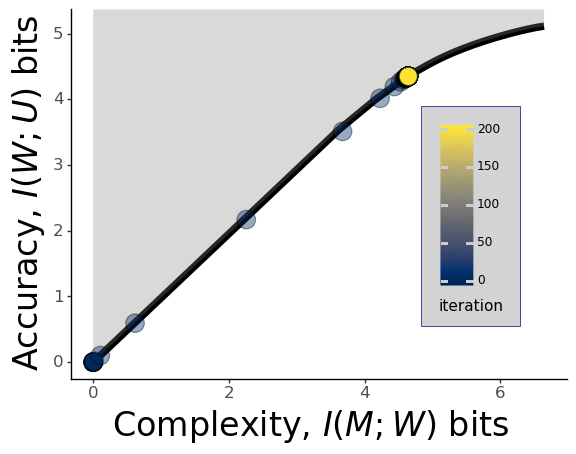

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6 x 6 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: temp_slide_traj


In [344]:

plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_ib_bound, mapping=pn.aes(x="complexity", y="accuracy")
    )
    # + pn.geom_point(size=1)
    + pn.geom_line(size=3) # IB curve    
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin="accuracy",
        ymax=torch.inf,
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_point( # trajectories
    # + pn.geom_line(
        data=new_df,
        mapping=pn.aes(
            fill="iteration",
            # color="imprecise_imitation_gamma"
            # color="population_init_gamma",
            ),
        alpha=0.4,
        size=7,
    )
    # + pn.labs(fill="iteration")
    # + pn.scale_fill_continuous("cividis")
    + pn.scale_fill_continuous(
        "cividis",
        breaks=[0, 50, 100, 150, 200],
        limits=[0, 200],
    )
    + pn.xlim([0,np.log2(100)])
    + pn.xlab("Complexity, $I(M;W)$ bits")
    + pn.ylab("Accuracy, $I(W;U)$ bits")

    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        legend_position=(0.75, 0.45),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    # guide not working, maybe should just use R
    + pn.guides(
        # fill = pn.guide_legend(
        fill = pn.guide_colorbar(
            title_position = "bottom", 
            # hjust = 0.5 centers the title horizontally
            title_hjust = 0.8,
            title_vjust = 2.,
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            # nrow=3,
            ),
    ) 
)
print(plot)
plot.save("temp_slide_traj", width=6, height=6, dpi=300,)

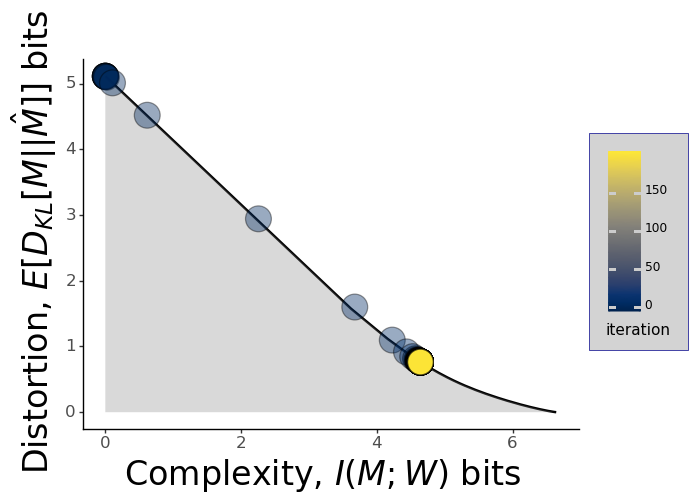

In [345]:

plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_ib_bound, mapping=pn.aes(x="complexity", y="distortion")
    )  
    # + pn.geom_point(size=1)
    + pn.geom_line(size=1) # IB curve    
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin=0,
        ymax="distortion",
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_point( # trajectories
    # + pn.geom_line(
        data=new_df,
        mapping=pn.aes(
            fill="iteration",
            # color="imprecise_imitation_gamma"
            # color="population_init_gamma",
            ),
        alpha=0.4,
        size=10,
    )
    + pn.scale_fill_continuous("cividis")
    # + pn.labs(fill="iteration")
    # + pn.scale_fill_continuous(
    #     type="magma",
    #     breaks=[0, 50, 100, 150, 200],
    #     limits=[0, 200],
    # )
    + pn.xlab("Complexity, $I(M;W)$ bits")
    + pn.ylab("Distortion, $E[D_{KL}[M || \hat{M}]]$ bits")

    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        # legend_position=(0.75, 0.325),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    # guide not working, maybe should just use R
    + pn.guides(
        # fill = pn.guide_legend(
        fill = pn.guide_colorbar(
            title_position = "bottom", 
            # hjust = 0.5 centers the title horizontally
            title_hjust = 0.8,
            title_vjust = 2.,
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            # nrow=3,
            ),
    ) 
)
print(plot)

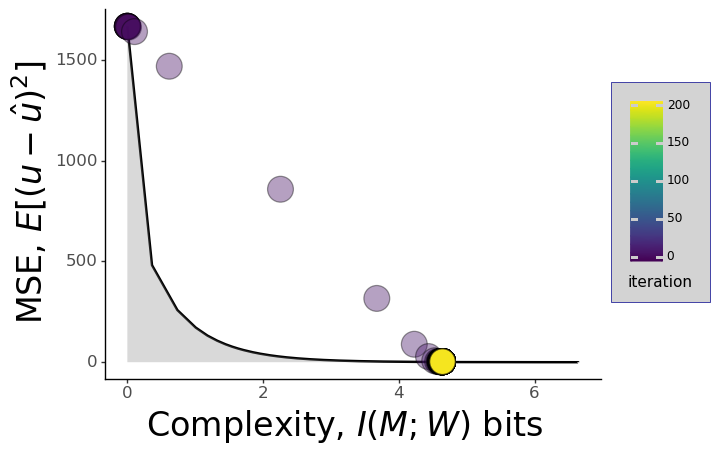

In [346]:

plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_mse_bound, mapping=pn.aes(x="complexity", y="mse")
    )  
    # + pn.geom_point(size=1)
    + pn.geom_line(size=1) # IB curve
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin=0,
        ymax="mse",
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_point( # trajectories
    # + pn.geom_line(
        data=new_df,
        mapping=pn.aes(
            fill="iteration",
            # color="imprecise_imitation_gamma"
            # color="population_init_gamma",
            ),
        alpha=0.4,
        size=10,
    )

    + pn.labs(fill="iteration")
    + pn.scale_fill_continuous(
        breaks=[0, 50, 100, 150, 200],
        limits=[0, 200],
    )
    + pn.xlab("Complexity, $I(M;W)$ bits")
    + pn.ylab("MSE, $E[(u - \hat{u})^2]$")

    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        # legend_position=(0.75, 0.325),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    # guide not working, maybe should just use R
    + pn.guides(
        # fill = pn.guide_legend(
        fill = pn.guide_colorbar(
            title_position = "bottom", 
            # hjust = 0.5 centers the title horizontally
            title_hjust = 0.8,
            title_vjust = 2.,
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            # nrow=3,
            ),
    ) 
)
print(plot)